In [1]:
import os

path = os.path.abspath(os.getcwd())
path = path + '\\dataset'

print(path)

train_folder = path + '\\train'
test_folder = path + '\\test'

print(train_folder+'\n',test_folder)

C:\Users\isacc\Desktop\Convolutional Neural Networks\dataset
C:\Users\isacc\Desktop\Convolutional Neural Networks\dataset\train
 C:\Users\isacc\Desktop\Convolutional Neural Networks\dataset\test


In [8]:
import tensorflow
from tensorflow.keras.utils import image_dataset_from_directory

print('Version: %s' % (tensorflow.__version__))
train_dataset = image_dataset_from_directory(train_folder,
                                             image_size=(128, 128),
                                             batch_size=32)
test_dataset = image_dataset_from_directory(test_folder,
                                            image_size=(128, 128),
                                            batch_size=32)

Version: 2.8.0
Found 11671 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


model = keras.Sequential()
model.add(Rescaling(scale=1.0/255))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [7]:
from struct import unpack
from tqdm import tqdm
import os

folder_test_rust = path + '\\test\\rust\\'
folder_test_healthy = path + '\\test\\healthy'
folder_train_rust = path + '\\train\\rust'
folder_train_healthy = path + '\\train\\healthy'

for diretorio, subpastas, arquivos in os.walk(folder_test_rust):
    list_test_rust = arquivos
for diretorio, subpastas, arquivos in os.walk(folder_test_healthy):
    list_test_healthy = arquivos
for diretorio, subpastas, arquivos in os.walk(folder_train_rust):
    list_train_rust = arquivos
for diretorio, subpastar, arquivos in os.walk(folder_train_healthy):
    list_train_healthy = arquivos
    
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}

class JPEG:
    def __init__(self, image_file):
        with open(image_file, 'rb') as f:
            self.img_data = f.read()
    
    def decode(self):
        data = self.img_data
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                return
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break        

bad_test_rust = []
bad_test_healthy = []
bad_train_rust = []
bad_train_healthy = []

for img in tqdm(list_test_rust):
  image = os.path.join(folder_test_rust, img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bad_test_rust.append(img)
    
for img in tqdm(list_test_healthy):
  image = os.path.join(folder_test_healthy, img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bad_test_healthy.append(img)

for img in tqdm(list_train_rust):
  image = os.path.join(folder_train_rust, img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bad_train_rust.append(img)

for img in tqdm(list_train_healthy):
  image = os.path.join(folder_train_healthy, img)
  image = JPEG(image) 
  try:
    image.decode()   
  except:
    bad_train_healthy.append(img)

print('{}:{}:{}:{}'.format(len(bad_test_rust), len(bad_test_healthy), len(bad_train_rust), len(bad_train_healthy)))
print(bad_train_healthy)

for name in bad_train_healthy:
  os.remove(os.path.join(folder_train_healthy, name))


100%|████████████████████████████████████████████████████████████| 5836/5836 [00:12<00:00, 479.23it/s]

0:0:0:1
['healthy (5438).jpg']


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint(
    filepath='model1.keras',
    save_best_only=True,
    monitor='val_loss'
)]

history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=test_dataset,
    callbacks=callbacks
)

Epoch 1/10
365/365 [==============================] - 4115s 11s/step - loss: 0.0276 - accuracy: 0.9907 - val_loss: 1.1290e-06 - val_accuracy: 1.0000
Epoch 2/10
365/365 [==============================] - 4731s 13s/step - loss: 6.0622e-07 - accuracy: 1.0000 - val_loss: 1.8251e-07 - val_accuracy: 1.0000
Epoch 3/10
365/365 [==============================] - 4144s 11s/step - loss: 1.3707e-07 - accuracy: 1.0000 - val_loss: 1.2014e-07 - val_accuracy: 1.0000
Epoch 4/10
365/365 [==============================] - 4135s 11s/step - loss: 9.5943e-08 - accuracy: 1.0000 - val_loss: 8.7092e-08 - val_accuracy: 1.0000
Epoch 5/10
365/365 [==============================] - 4133s 11s/step - loss: 7.1625e-08 - accuracy: 1.0000 - val_loss: 6.6299e-08 - val_accuracy: 1.0000
Epoch 6/10
365/365 [==============================] - 4103s 11s/step - loss: 5.6000e-08 - accuracy: 1.0000 - val_loss: 5.2796e-08 - val_accuracy: 1.0000
Epoch 7/10
365/365 [==============================] - 4165s 11s/step - loss: 4.5083e-0

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        8256      
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 246017    
                                                      

In [32]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 432x288 with 0 Axes>

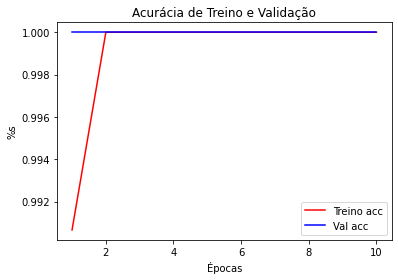

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, "r", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Acurácia de Treino e Validação")
plt.legend()
plt.figure()

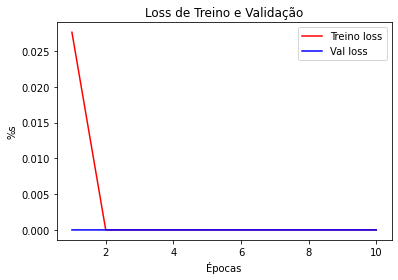

In [34]:
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel("Épocas")
plt.ylabel("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()

In [5]:
from PIL import Image
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
import os

def img(path, size, model_name):
    
    model = keras.models.load_model(model_name)
    size = size

    for d, sd, a in os.walk(path):
        list_names = a        
    for name in list_names:
        img = Image.open(path + '\\' + name)
        img = img.resize(size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred = (model.predict(x) > 0.5).astype('int32')[0][0]
        if pred > 0.5:
            print('Predict: rust --- %s --- %.2f' % (name, pred))
        else: 
            print('Predict: healthy --- %s --- %.2f' % (name, pred))
            
validation_folder = os.path.abspath(os.getcwd()) 
validation_folder = validation_folder + '.\\validation'

img(validation_folder, (128, 128), "model1.keras")

Predict: healthy --- healthy (1).jpg --- 0.00
Predict: healthy --- healthy (2).jpg --- 0.00
Predict: healthy --- healthy (3).jpg --- 0.00
Predict: healthy --- healthy (4).jpg --- 0.00
Predict: healthy --- healthy (5).jpg --- 0.00
Predict: healthy --- healthy (6).jpg --- 0.00
Predict: healthy --- healthy (7).jpg --- 0.00
Predict: rust --- rust (1).jpg --- 1.00
Predict: rust --- rust (2).jpg --- 1.00
Predict: rust --- rust (3).jpg --- 1.00
Predict: rust --- rust (4).jpg --- 1.00
Predict: healthy --- rust (5).png --- 0.00
Predict: rust --- rust (6).jpg --- 1.00
Predict: rust --- rust (7).webp --- 1.00
Predict: rust --- teste.jpg --- 1.00
Predict: rust --- teste2.jpg --- 1.00
Predict: healthy --- teste3.jpg --- 0.00
